# 資料說明

In [1]:
import pandas as pd
import numpy as np

In [2]:
readPath = './Data3/aac_shelter_outcomes.csv'
writePath = './Data3/NewData.csv'
Data = pd.read_csv(readPath)

print('----------------------------------------')
print('Columns：', list(Data.columns))

print('----------------------------------------')
print('Shape：', Data.shape)
DataNull = Data.isnull().sum()

print('----------------------------------------')
print('Null-Sum：')
print(DataNull[DataNull>0])

print('----------------------------------------')
print('unique number of each column')
for Col in Data.columns:
    print(Col, '：', len(Data[Col].unique()))
print('----------------------------------------')

# Austin Animal Center是美國最大的不間斷動物收容所，
# 每年為超過18,000只動物提供照料和庇護所，
# 並參與了一系列縣、市和州範圍內的保護和照顧被遺棄者的舉措，
# 高風險和投降的動物。

# explanation
# age_upon_outcome：Age of the animal at the time at which it left the shelter.
# animal_id：ID
# animal_type：Cat, dog, or other (including at least one bat!).
# breed：Animal breed. Many animals are generic mixed-breeds, e.g. "Long-haired mix".
# color：Color of the animal's fur, if it has fur.
# date_of_birth：Date of birth
# datetime：leave of datetime
# monthyear：leave of datetime
# name：Name
# outcome_subtype
# outcome_type：Ultimate outcome for this animal. Possible entries include transferred, [mercy] euthanized, adopted.
# sex_upon_outcome：Sex of animal

----------------------------------------
Columns： ['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color', 'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome']
----------------------------------------
Shape： (78256, 12)
----------------------------------------
Null-Sum：
age_upon_outcome        8
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64
----------------------------------------
unique number of each column
age_upon_outcome ： 47
animal_id ： 70855
animal_type ： 5
breed ： 2128
color ： 525
date_of_birth ： 5869
datetime ： 64361
monthyear ： 64361
name ： 14575
outcome_subtype ： 20
outcome_type ： 10
sex_upon_outcome ： 6
----------------------------------------


# 資料前處理

In [3]:
from sklearn.preprocessing import LabelEncoder
def ConvertTypeToNumber(Data):
#     print('Class：', Data.unique())
    orgLabel = list(Data.unique())
    classLE = LabelEncoder()
    Data = classLE.fit_transform(Data.values)
    NewLabel = list(pd.DataFrame(Data)[0].unique())
    mappingLabel = [orgLabel, NewLabel]
    return Data, mappingLabel

def twoListSort(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists)
    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2

def LEDef(Data, Type):
    Data[Type], TempLabel = ConvertTypeToNumber(Data[Type])
    TempLabel = twoListSort(TempLabel[1], TempLabel[0])
    print(Type, ' ： ', TempLabel)
    print('')
    return Data

def cutDef(Data, Type, qcutNum):
    Data[Type] = pd.qcut(Data[Type], qcutNum)
    Data[Type], TempLabel = ConvertTypeToNumber(Data[Type])
    TempLabel = twoListSort(TempLabel[1], TempLabel[0])
    print(Type, ' ： ', TempLabel)
    print(Type, ' - counts：')
    print(Data[Type].value_counts(normalize=True))
    print('')
    return Data

import matplotlib.pyplot as plt
def plotHistogram(Data, title, xLabel, yLabel):
    fig, ax = plt.subplots(figsize = (4, 3))
    DataCounts = Data.value_counts(normalize=False)
    x = DataCounts.index
    y = DataCounts
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plt.show()

----------------------------------------
Before：
Columns： ['age_upon_outcome', 'animal_type', 'outcome_type', 'sex_upon_outcome']

Shape： (78256, 4)

NewData：
  age_upon_outcome animal_type outcome_type sex_upon_outcome
0          2 weeks         Cat     Transfer      Intact Male
1           1 year         Dog     Transfer    Spayed Female
2           1 year         Dog     Adoption    Neutered Male
3          9 years         Dog     Transfer    Neutered Male
4         5 months       Other   Euthanasia          Unknown
----------------------------------------
----------------------------------------
animal_type
['Cat' 'Dog' 'Other']
Dog      0.565350
Cat      0.375971
Other    0.058679
Name: animal_type, dtype: float64


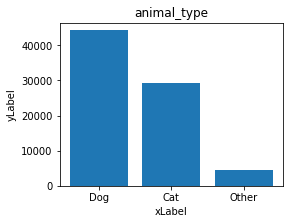

outcome_type
['Transfer' 'Adoption' 'Other']
Adoption    0.423124
Transfer    0.300284
Other       0.276592
Name: outcome_type, dtype: float64


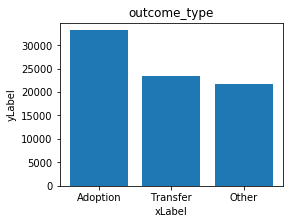

sex_upon_outcome
['Male' 'Female' 'Unknow']
Male      0.477062
Female    0.438893
Unknow    0.084045
Name: sex_upon_outcome, dtype: float64


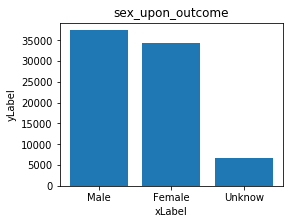

----------------------------------------
----------------------------------------
DateTime
age_upon_outcome
[  14  365 3285  150  120 1095   30   90  730   60 1460 2920   21  240
 4380 2555 1825 2190    5  300   28 3650    2  180 5110  330 5475  210
 4745 4015 5840  270    3    6    4   35    7    1    0 6205 7300 6570
 6935 8030 9125]
365     0.183455
730     0.143058
60      0.117741
1095    0.065906
90      0.043988
30      0.042736
1460    0.038212
1825    0.034391
120     0.030991
150     0.024934
180     0.024243
2190    0.023132
2920    0.019860
2555    0.019643
21      0.018748
14      0.016997
300     0.015387
28      0.015259
240     0.015055
3650    0.014812
210     0.012307
7       0.012013
3285    0.010505
270     0.008601
4380    0.007783
330     0.006262
4015    0.005483
4745    0.004971
5110    0.003233
3       0.003003
2       0.002773
5475    0.002658
1       0.001955
6       0.001943
4       0.001738
5       0.001482
5840    0.001291
0       0.001214
35      0.000780

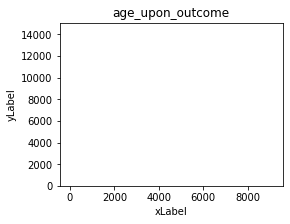

----------------------------------------
----------------------------------------
LEDef
animal_type  ：  ([0, 1, 2], ['Cat', 'Dog', 'Other'])

outcome_type  ：  ([0, 1, 2], ['Adoption', 'Other', 'Transfer'])

sex_upon_outcome  ：  ([0, 1, 2], ['Female', 'Male', 'Unknow'])

----------------------------------------
----------------------------------------
cut
age_upon_outcome  ：  ([0, 1, 2], [Interval(-0.001, 150.0, closed='right'), Interval(150.0, 730.0, closed='right'), Interval(730.0, 9125.0, closed='right')])
age_upon_outcome  - counts：
1    0.408368
0    0.338296
2    0.253336
Name: age_upon_outcome, dtype: float64

----------------------------------------
----------------------------------------
After：
Columns： ['age_upon_outcome', 'animal_type', 'outcome_type', 'sex_upon_outcome']

Shape： (78248, 4)

NewData：
   age_upon_outcome  animal_type  outcome_type  sex_upon_outcome
0                 0            0             2                 1
1                 1            1             2 

In [4]:
NewData = Data.drop(columns=['animal_id', 'monthyear', 'name', 'outcome_subtype', 'breed', 'color', 'date_of_birth', 'datetime'])
print('----------------------------------------')
print('Before：')
print('Columns：', list(NewData.columns))
print('')
print('Shape：', NewData.shape)
print('')
print('NewData：')
print(NewData.head(5))
print('----------------------------------------')

print('----------------------------------------')
NewData.loc[(NewData['animal_type'] == 'Bird') |
         (NewData['animal_type'] == 'Livestock') |
         (NewData['animal_type'] == 'Other'), 'animal_type'] = 'Other'
print('animal_type')
print(NewData['animal_type'].unique())
print(NewData['animal_type'].value_counts(normalize=True))
plotHistogram(NewData['animal_type'], 'animal_type', 'xLabel', 'yLabel')

NewData.loc[(NewData['outcome_type'] != 'Adoption') &
         (NewData['outcome_type'] != 'Transfer'), 'outcome_type'] = 'Other'
print('outcome_type')
print(NewData['outcome_type'].unique())
print(NewData['outcome_type'].value_counts(normalize=True))
plotHistogram(NewData['outcome_type'], 'outcome_type', 'xLabel', 'yLabel')

NewData['sex_upon_outcome'] = NewData['sex_upon_outcome'].str.extract(' ([A-Za-z]+)', expand=False)
NewData['sex_upon_outcome'] = NewData['sex_upon_outcome'].fillna('Unknow')
print('sex_upon_outcome')
print(NewData['sex_upon_outcome'].unique())
print(NewData['sex_upon_outcome'].value_counts(normalize=True))
plotHistogram(NewData['sex_upon_outcome'], 'sex_upon_outcome', 'xLabel', 'yLabel')

# dropna
NewData = NewData.dropna()
print('----------------------------------------')

print('----------------------------------------')
print('DateTime')
# weeks months years convert to days
AUO_Temp = NewData['age_upon_outcome'].str.split(' ', expand=True)
AUO_Temp.columns = ['A', 'B']
AUO_Temp['B'] = AUO_Temp['B'].replace(['day', 'days', 'week', 'weeks', 'month', 'months', 'year', 'years'], [1, 1, 7, 7, 30, 30, 365, 365])
AUO_Temp = AUO_Temp.astype('int32')
NewData['age_upon_outcome'] = AUO_Temp['A'] * AUO_Temp['B']
print('age_upon_outcome')
print(NewData['age_upon_outcome'].unique())
print(NewData['age_upon_outcome'].value_counts(normalize=True))
plotHistogram(NewData['age_upon_outcome'], 'age_upon_outcome', 'xLabel', 'yLabel')
print('----------------------------------------')

print('----------------------------------------')
print('LEDef')
NewData = LEDef(NewData, 'animal_type')
NewData = LEDef(NewData, 'outcome_type')
NewData = LEDef(NewData, 'sex_upon_outcome')
print('----------------------------------------')
    
print('----------------------------------------')
print('cut')
NewData = cutDef(NewData, 'age_upon_outcome', 3)
print('----------------------------------------')

print('----------------------------------------')
print('After：')
print('Columns：', list(NewData.columns))
print('')
print('Shape：', NewData.shape)
print('')
print('NewData：')
print(NewData.head(5))
print('----------------------------------------')

# Label Encode to OneHot Encode

In [5]:
NewData2 = pd.DataFrame()
for Col in list(NewData.columns):
    DataTemp = pd.get_dummies(NewData[Col], prefix = Col)
    NewData2 = pd.concat([NewData2, DataTemp], axis=1)
print(NewData2)

       age_upon_outcome_0  age_upon_outcome_1  age_upon_outcome_2  \
0                       1                   0                   0   
1                       0                   1                   0   
2                       0                   1                   0   
3                       0                   0                   1   
4                       1                   0                   0   
...                   ...                 ...                 ...   
78250                   1                   0                   0   
78251                   1                   0                   0   
78252                   0                   0                   1   
78254                   1                   0                   0   
78255                   1                   0                   0   

       animal_type_0  animal_type_1  animal_type_2  outcome_type_0  \
0                  1              0              0               0   
1                  0           

# 輸出資料

In [6]:
NewData2.to_csv(writePath, index = False)